In [ ]:
import os
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
data_path=(r'/content/drive/My Drive/animal')

categories=os.listdir(data_path) #this is used to show the files names in the datapath
print(categories)
labels=np.arange(len(categories))
print(labels)
label_dict=dict(zip(categories,labels))
print(label_dict)

Mounted at /content/drive
['dog', 'cat']
[0 1]
{'dog': np.int64(0), 'cat': np.int64(1)}


In [ ]:
import cv2
img_size=50

data=[]
target=[]

for category in categories:
  imgs_path=os.path.join(data_path,category)
  img_names=os.listdir(imgs_path)
  #print(img_names)

  for img_name in img_names:
    img_path=os.path.join(imgs_path,img_name)
    try:
      img=cv2.imread(img_path)
      img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
      img=cv2.resize(img,(img_size,img_size))

      data.append(img)
      target.append(label_dict[category])

    except Exception as e:
      print(img_path,e)
      continue



In [ ]:
data_new= np.array(data)
terget= np.array(target)

print(data_new.shape)
print(terget.shape)


(4000, 50, 50)
(4000,)


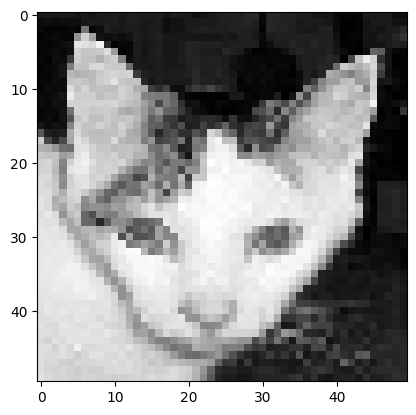

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(data_new[3000],cmap='gray')
plt.show()

In [ ]:
data_new = data_new.reshape(data_new.shape[0],img_size,img_size,1) #converting to 4D, CNN needs 4D inputs
print(data_new.shape)

(4000, 50, 50, 1)


In [ ]:
#normalizing/scaling

data_new=data_new/255.0
from keras.utils import to_categorical
new_target=to_categorical(terget)
print(new_target.shape)

(4000, 2)


In [ ]:
np.save('data',data_new)
np.save('target',new_target)